## Clase 18 - ML y Deep Learning ----------------------------------
### 18-04-2024 -------------------------------------------------------------

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
tf.__version__  # Version de TensorFlow

'2.16.1'

In [3]:
np.__version__  # Version de NumPy

'1.26.4'

### Que es una red neuronal?
Una red neuronal esta compuesto por neuronas, las cuales a traves de las dentritas reciben la informacion, se procesa en el nucleo para luego ser enviadas por la mielina en el axón para transmitir la informacion a traves de los botones sinapticos.

Las neuronas artificiales reciben los impulsos de entrada, y cada una de las conexiones de entrada van a estar asociados a un peso, luego la suma de todos los valores por el peso mas un bias pasa por una funcion de activacion para luego devolver el resultado.

Los datos de entrada deber ser **normalizados** antes de entrenar la red neuronal. La normalizacion es importante para que los datos no esten en diferentes escalas, ya que esto puede afectar el entrenamiento de la red neuronal. 


### Funciones de activacion

- **Funcion de activacion lineal**: `f(x) = x`
- **Funcion de activacion escalonada**: `f(x) = 1 si x >= 0, 0 si x < 0`
- **Funcion de activacion sigmoide**: `f(x) = 1 / (1 + e^-x)`
- **Funcion de activacion tangente hiperbolica**: `f(x) = (e^x - e^-x) / (e^x + e^-x)`
- **Funcion de activacion ReLU**: `f(x) = max(0, x)`
- **Funcion de activacion Leaky ReLU**: `f(x) = max(0.01x, x)`
- **Funcion de activacion ELU**: `f(x) = x si x > 0, alpha(e^x - 1) si x <= 0`

<br/>
<br/>

| Tipo de problema | Tipo de Salida                  | Funcion de activacion | Funcion de perdida           |
|------------------|---------------------------------|-----------------------|------------------------------|
Regresion | Valor numerico                  | Lineal | Error cuadratico medio (MSE) |
Clasificacion  | Binario                         | Sigmoide | Entropia cruzada binaria     |
Clasificacion  | Una etiqueta o multiples clases | Softmax | Entropia cruzada categorica  |
Claificacion  | Multiples etiquetas o clases    | Sigmoid | Entropia cruzada binaria     |

<br/>

### Percetron

Es la unidad basica de una red neuronal, es una neurona artificial que recibe multiples entradas y devuelve una salida. La salida es calculada por la suma de los productos de las entradas por los pesos mas el bias, luego pasa por una funcion de activacion.

<br/>

### Perceptron multicapa

Es una red neuronal que esta compuesta por multiples capas de perceptrones. Cada capa esta compuesta por multiples perceptrones, y cada perceptron esta conectado con todos los perceptrones de la capa anterior. La primera capa se llama capa de entrada, la ultima capa se llama capa de salida, y las capas intermedias se llaman capas ocultas.

<br/>

### Gradiente descendente

**Gradient Descent**

`Costo = (1 / 2) * (y - y_pred)^2`

- Es un algoritmo de optimizacion que se utiliza para minimizar una funcion de perdida. El algoritmo consiste en calcular la derivada de la funcion de perdida con respecto a los pesos y bias, 

**Stockastic Gradient Descent (SGD)**

- Es una variante del gradiente descendente que se utiliza para minimizar la funcion de perdida. En lugar de calcular el gradiente de la funcion de perdida con respecto a todos los datos de entrenamiento, se calcula el gradiente con respecto a un solo dato de entrenamiento.

**Mini-batch Gradient Descent**

- Es una variante del gradiente descendente que se utiliza para minimizar la funcion de perdida. En lugar de calcular el gradiente de la funcion de perdida con respecto a todos los datos de entrenamiento, se calcula el gradiente con respecto a un subconjunto de datos de entrenamiento.

### Optimizadores

- **SGD**: Stockastic Gradient Descent
- **Adam**: Adaptive Moment Estimation

**SDG**:
- Este optimizador trata de encontrar minimos o maximos por iteracion. 
- Al igual que en el gradiente descendiente, el gradiente indica la direccion (en la que la funcion tiene el ratio de aumento mas pronunciada) aunque no indica hasta donde se debe avanzar en esa direccion.
- Como no nos fija cuanto avanzar, existe el ratio de aprendizaje (learning rate) que nos indica cuanto avanzar en la direccion del gradiente.

**Adam**:
- El optimizador Adam trata de solventar el problema de la fijacion del ratio de aprendizaje del SGD, para ello calcula el ratio de aprendizaje de forma adaptativa para cada parametro. Si los gradientes de un parametro son muy dispersos, el ratio de aprendizaje se reduce, y si los gradientes son mas consistentes, el ratio de aprendizaje se incrementa.
- Adam es un optimizador que combina las ventajas de otros optimizadores como RMSprop y Adagrad.

### Actualizacion de pesos

`w = w - learning_rate * dw`

`b = b - learning_rate * db`

- Se calculan las derivadas parciales de la funcion de perdida con respecto unicamenta a los parametros de la ultima capa, sin influir sobre ningun otro parametro de las capas anteriores.
- Una vez obtenidas las derivadas, se pasa a la capa anterior y se calculan las derivadas parciales de la funcion de perdida, pero ahora con respecto a los parametros de esta capa.
- Este proceso se repite hasta llegar a la capa de entrada.


### Ejemplo practico - Boston House Price Prediction

In [17]:
# Cargamos el dataset de Boston Housing
(train_data, train_output), (test_data, test_output) = tf.keras.datasets.boston_housing.load_data()

In [18]:
# Imprimimos la estructura de los datos de entrenamiento y test
train_data.shape, train_output.shape, test_data.shape, test_output.shape

((404, 13), (404,), (102, 13), (102,))

In [19]:
# Normalizar los datos de entrenamiento
# Encuentro la media
train_mean = np.mean(train_data, axis=0)
# Encuentro la desviacion estandar
train_std = np.std(train_data, axis=0)

In [20]:
# Normalizar los datos de test
test_mean = np.mean(test_data, axis=0)
test_std = np.std(test_data, axis=0)

In [21]:
# Normalizo los datos de entrenamiento
train_data = (train_data - train_mean) / train_std

In [22]:
# Normalizo los datos de test
test_data = (test_data - test_mean) / test_std

In [59]:
# Creamos el modelo
def build_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.Input(shape=(train_data.shape[1],)))  # Use Input layer
    model.add(tf.keras.layers.Dense(128, activation='relu'))  # 13 entradas en shape
    model.add(tf.keras.layers.Dropout(0.5))  # Regularización para evitar overfitting
    model.add(tf.keras.layers.Dense(64, activation='relu'))  # rectified linear unit
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(1, activation='linear'))  # linear en la salida siempre que sea regresión

    model.compile(loss='mse', optimizer='adam',
                  metrics=['mse', 'mae'])  # mse = mean squared error, mae = mean absolute error
    model.summary()
    return model

In [60]:
model = build_model()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,113 (39.50 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
history = model.fit(train_data, train_output, validation_data=(test_data, test_output), epochs=100, batch_size=8)

Epoch 1/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 504.1375 - mae: 20.4900 - mse: 504.1375 - val_loss: 298.2153 - val_mae: 15.2417 - val_mse: 298.2153
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - loss: 157.2705 - mae: 10.4062 - mse: 157.2705 - val_loss: 56.1077 - val_mae: 5.9363 - val_mse: 56.1077
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - loss: 64.6043 - mae: 5.9236 - mse: 64.6043 - val_loss: 33.1714 - val_mae: 4.3817 - val_mse: 33.1714
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - loss: 43.0621 - mae: 4.7101 - mse: 43.0621 - val_loss: 25.8607 - val_mae: 3.8429 - val_mse: 25.8607
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 31.7981 - mae: 4.2814 - mse: 31.7981 - val_loss: 24.8251 - val_mae: 3.6783 - val_mse: 24.8251
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - loss: 37.6869 - mae: 4.4731 - mse: 37.6869 - val_loss: 23.4865 - val_mae: 3.4558 - val_mse: 23.4865
Epoch 7/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - loss: 30

In [62]:
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.plot(history.epoch, history.history['mae'], label='Training error')
    plt.plot(history.epoch, history.history['val_mae'], label='Test error')
    plt.legend()
    plt.show()

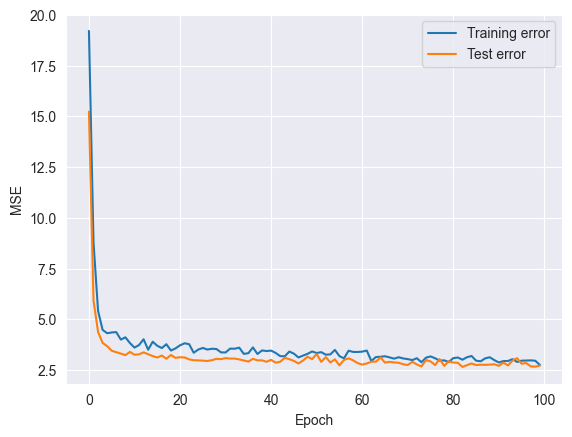

In [63]:
plot_history(history)

In [53]:
# Evaluamos el modelo con los datos de test
model.evaluate(test_data, test_output)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - loss: 14.0147 - mae: 2.5865 - mse: 14.0147


[17.779888153076172, 17.779888153076172, 2.77964448928833]

In [54]:
# Hacemos una predicción con el modelo
model.predict(test_data[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[ 8.391219],
       [18.230312],
       [22.318676],
       [30.483368],
       [25.637333],
       [20.267635],
       [28.580816],
       [22.589796],
       [19.071976],
       [19.99924 ]], dtype=float32)

### Regulaización

**Dropout**

- Es una tecnica de regularizacion que se utiliza para evitar el overfitting en una red neuronal. La tecnica consiste en desactivar aleatoriamente un porcentaje de las neuronas de una capa durante el entrenamiento.
- El dropout se aplica durante el entrenamiento, pero no durante la prediccion.

**Early Stopping**

- Es una tecnica de regularizacion que se utiliza para evitar el overfitting en una red neuronal. La tecnica consiste en detener el entrenamiento de la red neuronal cuando el error de validacion empieza a aumentar.
- El early stopping se aplica durante el entrenamiento, pero no durante la prediccion.
- El early stopping se puede aplicar en combinacion con el dropout.

**Model Checkpoint**

- Es una tecnica de regularizacion que se utiliza para evitar el overfitting en una red neuronal. La tecnica consiste en guardar el modelo con el menor error de validacion durante el entrenamiento.
- El model checkpoint se aplica durante el entrenamiento, pero no durante la prediccion.
- El model checkpoint se puede aplicar en combinacion con el dropout y el early stopping.
- El model checkpoint se puede utilizar para guardar el modelo en un fichero.

**Regularizacion L1 y L2**

- Es una tecnica de regularizacion que se utiliza para evitar el overfitting en una red neuronal. La tecnica consiste en añadir un termino de regularizacion a la funcion de perdida.
- La regularizacion L1 añade el valor absoluto de los pesos a la funcion de perdida.
- La regularizacion L2 añade el cuadrado de los pesos a la funcion de perdida.
- La regularizacion L1 y L2 se pueden aplicar en combinacion con el dropout, early stopping y model checkpoint.
- La regularizacion L1 y L2 se pueden utilizar para penalizar los pesos de la red neuronal.
- La regularizacion L1 y L2 se pueden utilizar para reducir el overfitting en una red neuronal.
- La regularizacion L1 y L2 se pueden utilizar para mejorar el rendimiento de una red neuronal.